**Individual Planning Report**

**Sean Kim (Student ID: 16651259)**

In [6]:
library(dplyr)
library(ggplot2)
library(readr)

**(1) Data Description:**

**Sessions**

In [7]:
sessions = read_csv("sessions.csv")
head(sessions)
summary(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [8]:
str(sessions)

spc_tbl_ [1,535 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ hashedEmail        : chr [1:1535] "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" "36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686" "f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc" "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" ...
 $ start_time         : chr [1:1535] "30/06/2024 18:12" "17/06/2024 23:33" "25/07/2024 17:34" "25/07/2024 03:22" ...
 $ end_time           : chr [1:1535] "30/06/2024 18:24" "17/06/2024 23:46" "25/07/2024 17:57" "25/07/2024 03:58" ...
 $ original_start_time: num [1:1535] 1.72e+12 1.72e+12 1.72e+12 1.72e+12 1.72e+12 ...
 $ original_end_time  : num [1:1535] 1.72e+12 1.72e+12 1.72e+12 1.72e+12 1.72e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   hashedEmail = col_character(),
  ..   start_time = col_character(),
  ..   end_time = col_character(),
  ..   original_start_time = col_double(),
  ..   original_end_time = col_double()


- **Number of observations:**
    - 1535 observations
- **Number of variables:**
    - 5 variables
- **name and type of variables:**
                                                                    
| Name                | Type |
|---------------------|------|
| hashedEmail         | chr  |
| start_time          | chr  |
| end_time            | chr  |
| original_start_time | num  |
| original_end_time   | num  | 

- **What do the variables mean?:**
    - hashedEmail:
        - *these are the emails of users converted into unreadable strings*
    - start_time:
        - *Start time of a session in a human-readable format*
    - end_time:
        - *End time of a session in a human-readable format*
    - original_start_time:
        - *Start time in a format easier for computers*
    - original_end_time:
        - *End time in a format easier for computers*
- **Issues?:**
    - The 'start_time' and 'end_time' are in formats that need to be converted into values that computers can read when performing analysis. Likewise, 'original_start_time' and 'original_end_time' need to be converted into human-readable format after analysis for easier understanding.
    - There may be outliers in the data. Some sessions might be extremely short due to a quit exit, or some very long because someone left the game on.
    - For analysis, the two datasets will need to be combined. When that happens, we need to make sure each observation from one dataset is matched with the correct observation from the other dataset.


In [9]:
players = read_csv("players.csv")
head(players)
summary(players)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age        individualId  
 Length:196         Length:196         Min.   : 8.00   Mode:logical  
 Class :character   Class :character   1st Qu.:17.00   NA's:196      
 Mode  :character   Mode  :character   Median :19.00                 
                                       Mean   :21.28                 
                                       3rd Qu.:22.00                 
                                       Max.   :99.00                 

In [10]:
str(players)

spc_tbl_ [196 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ experience      : chr [1:196] "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe       : logi [1:196] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail     : chr [1:196] "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours    : num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name            : chr [1:196] "Morgan" "Christian" "Blake" "Flora" ...
 $ gender          : chr [1:196] "Male" "Male" "Male" "Female" ...
 $ age             : num [1:196] 9 17 17 21 21 17 19 21 17 22 ...
 $ individualId    : logi [1:196] NA NA NA NA NA NA ...
 $ organizationName: logi [1:196] NA NA NA NA NA NA ...
 - attr(*, "spec")=
  .. cols(
  ..   experience = col_character(),
  ..   subscribe = col_logical(),
  .. 

- **Number of observations:**
    - 196 observations
- **Number of variables:**
    - 9 variables
- **name and type of variables:**
                                                                    
| Name             | Type |
|------------------|------|
| experience       | chr  |
| subscribe        | logi |
| hashedEmail      | chr  |
| played_hours     | num  |
| name             | chr  | 
| gender           | chr  |
| age              | num  |
| individualId     | logi |
| organizationName | logi |

- **What do the variables mean?:**
    - experience:
        - *What level players are at (pro, veteran, amateur, regular)*
    - subscribe:
        - *Whether or not the player has a subscription*
    - hashedEmail:
        - *Hashed version of player's email*
    - played_hours:
        - *How many hours a player has played*
    - name:
        - *Name of the player*
    - gender:
        - *Gender of the player*
    - age:
        - *Age of the player*
    - individualId:
        - *ID for player*
    - organizationName:
        - *Organization player is associated with*
- **Issues?:**
    - Variables 'individualId' and 'organizationName' don't contain any values. These missing values may be correlated with other values in the dataset
    - There are some outliers in the 'age' and 'played_hours' variables which may skew the data.
    - The hashed emails are not in the order of the sessions.csv dataset. When merging, both datasets need to be organized according to the email identification.
    - There are only 196 observations in players.csv vs. 1535 observations in sessions.csv.

- **How was the data collected?:**
    - The data was collected by researchers at PLAI who set up a private server for Minecraft. Players who join the server have their actions recorded.

**(2) Question:**

The question that we will try to answer using the datasets is, how do player experience level (veteran and above), age (under 20), and total hours played influence the duration of a game sessions?

To do so, the two datasets need to be merged and organized based on matching hashed emails. Then filter the data by experience level (veteran and up) and age (under 20). For non-numerical values, they will need to be encoded for the computer to read.

Since, one player may have multiple start and end times, we will first use played_hours variable from players.csv as the response variable first. 

**(3) Exploratory Data Analysis and Visualization**

For the response variable we plot it to see what the data looks like.   

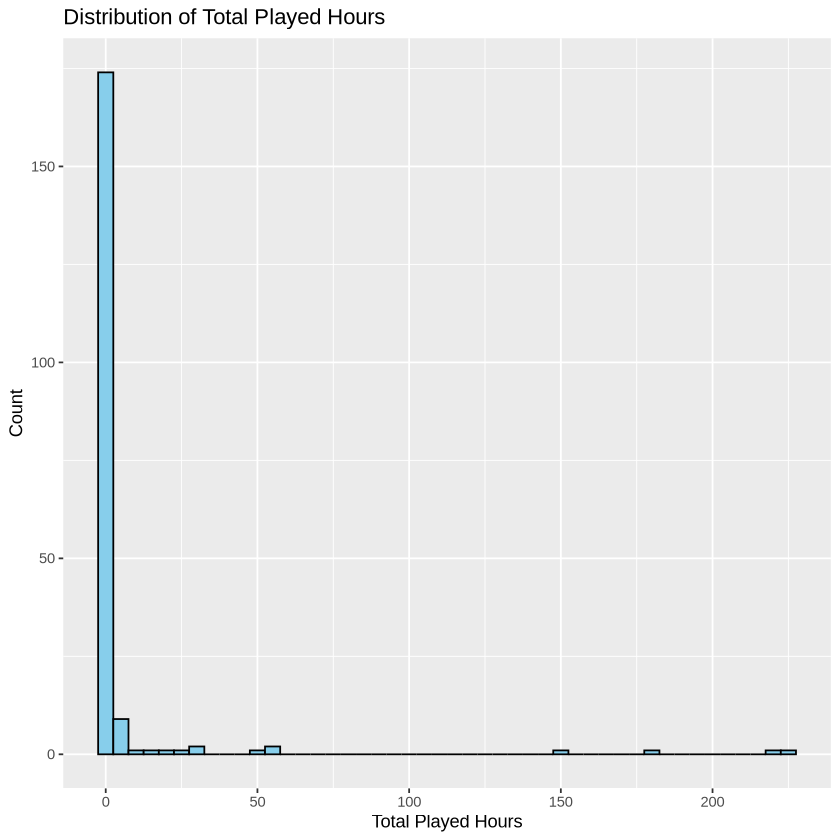

In [20]:
response_var = ggplot(players, aes(x = played_hours)) +
    geom_histogram(binwidth = 5, fill = "skyblue", color = "black") + 
    ggtitle("Distribution of Total Played Hours") +
    xlab("Total Played Hours") +
    ylab("Count")
response_var

It looks like most players haven't played the game at all at 0 hours. We have 196 observations for players.csv, and at least 170 haven't played at all. While this seems like a regression task, having the data heavily skewed will not help a model learn the patterns in the data. 

Next, we take a look at the relationship between age(unfiltered) and played_time.

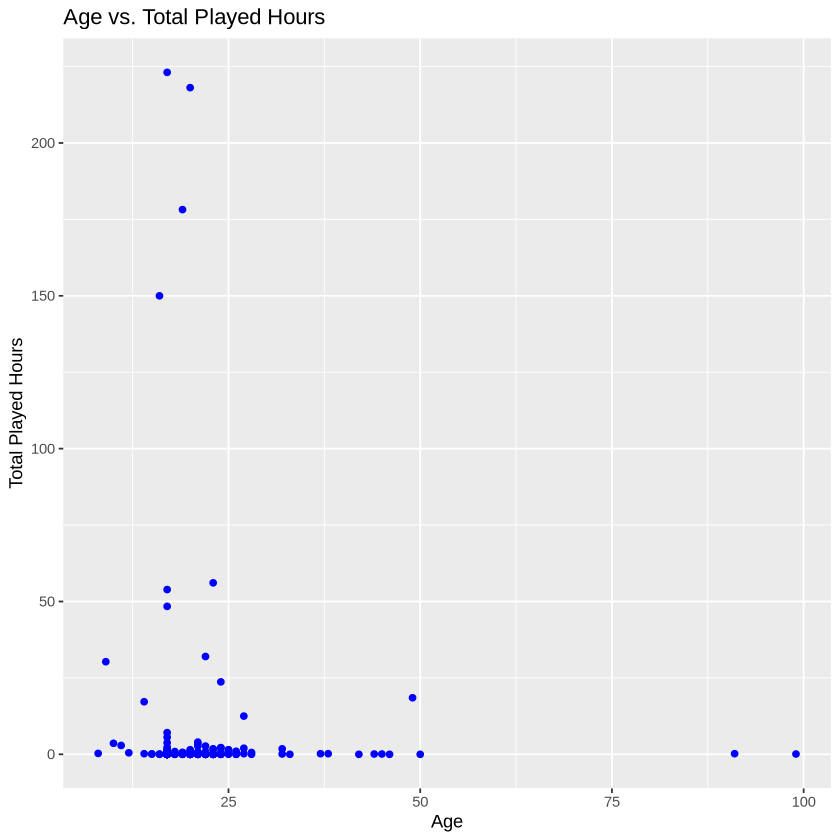

In [24]:
age_var = ggplot(players, aes(x = age, y = played_hours)) +
    geom_point(color = "blue") +
    ggtitle ("Age vs. Total Played Hours") +
    xlab("Age") + 
    ylab("Total Played Hours")
age_var

Looking at age vs. played hours, it appears participants under 30 showed the most activity. Filtering the data for 30 and under might show us a clearer picture.

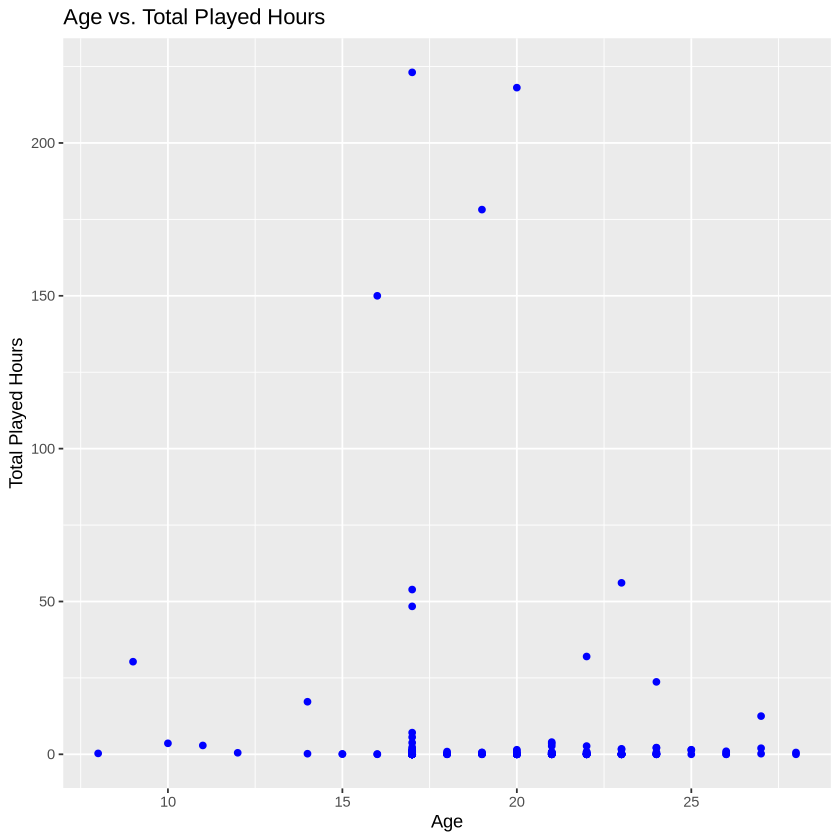

In [25]:
players_age = players |>
    filter(age < 30)

age_var2 = ggplot(players_age, aes(x = age, y = played_hours)) +
    geom_point(color = "blue") +
    ggtitle ("Age vs. Total Played Hours") +
    xlab("Age") + 
    ylab("Total Played Hours")
age_var2

Playing time for participants seems to reach its highest point around the age of 20.

**(4) Methods and Plan**

Linear regression will be the first model to test. This is because we believe that age and experience level may have a linear relationship with time played (e.g. if you're good at the game, you play more, or the younger you are the more time you have to play).  

However, linear regression will not be effective if the variables are not linearly correlated. If linear regression does not reveal a relationship, we will switch to classification using knn regression or knn. 

Also, we do have a lot of people who have not played the game at all. Using linear regression will skew the data, hence it may be worth to try filtering 0 played_hours out. This then poses the risk of the model not having enough data to learn. Using sessions to figure out played_time will be the next step. 

To fully explore the data, we will use both linear and knn regression as well as the K-nearest neighbor classification method. Results will be compared with metrics such as mpse and correlation coefficients. 

Data splitting may differ depending on the model we are testing, but for the linear regression model we are aiming for a 70% training and 30% testing splits. However, if we do decide to use cross-validation to test things out, we will start with a cv value of 5 or smaller as the dataset is small. 